## Titanic Analysis

03/04/2025 

### Step 1: Load and explore the Titanic dataset


In [4]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


# load titanic dataset into pandas DataFrame
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url) 

In [5]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 2: Data cleaning and preprocessing

##### 2.1 Handle missing values

In [6]:
# find missing values
titanic_df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Handle the Age, Embarked, and Cabin NaN values

# Fill NaN values with the mode for the Embarked column
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Fill NaN values in the Age column with the mean Age
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())

# Fill NaN values in the Cabin column with "Unknown" since there are too many NaN values to drop those rows
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("Unknown")


In [8]:
# View changes
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


##### 2.2 Convert categorical variables to numerical ones using one-hot encoding

In [9]:
# convert Pclass, Sex, and Embarked columns with one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Pclass', 'Sex', 'Embarked'])

##### 2.3 Drop unnecessary columns

In [10]:
# drop the columns we will not be using for data analysis
titanic_df = titanic_df.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']) 

In [11]:
# view changes
titanic_df

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.000000,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.000000,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.000000,53.1000,True,False,False,True,False,False,False,True
4,5,0,35.000000,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,False,True,False,False,True,False,False,True
887,888,1,19.000000,30.0000,True,False,False,True,False,False,False,True
888,889,0,29.699118,23.4500,False,False,True,True,False,False,False,True
889,890,1,26.000000,30.0000,True,False,False,False,True,True,False,False


### Step 3: Analyze the dataset to extract meaningful insights

In [12]:
# Calculate basic statistics
titanic_df.describe()

# Group data by 'Survived' to see correlations
grouped_data = titanic_df.groupby('Survived').mean()
grouped_data

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,,,,,,,,,,,
0,447.016393,30.415100,22.117887,0.145719,0.176685,0.677596,0.147541,0.852459,0.136612,0.085610,0.777778
1,444.368421,28.549778,48.395408,0.397661,0.254386,0.347953,0.681287,0.318713,0.271930,0.087719,0.640351


In [13]:
# Calculate survival rate
survivors = titanic_df[titanic_df['Survived'] == 1].shape[0]
print(f"Number of survivors: {survivors}")

non_survivors = titanic_df[titanic_df['Survived'] == 0].shape[0]
print(f"Number of non-survivors: {non_survivors}")

total_passengers = titanic_df.shape[0]

# Survival Rate
print(f"Survival Rate: {(survivors/total_passengers)*100:.2f}%")

Number of survivors: 342
Number of non-survivors: 549
Survival Rate: 38.38%


#### The overall survival rate was 38.38%, and we can see significant correlations for specific features after grouping the data. We will explore the effect of Sex, Embarked Location, Class and Age on survival rate in more detail below.

### Step 4: Visualize the data using matplotlib

   Gender  Survival Rate
0  Female       0.742038
1    Male       0.188908


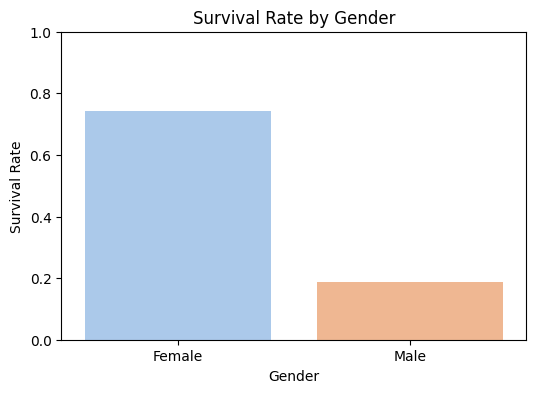

In [14]:
# Group by gender columns and calculate survival rate
gender_survival = {
    'Female': titanic_df[titanic_df['Sex_female'] == 1]['Survived'].mean(),
    'Male': titanic_df[titanic_df['Sex_male'] == 1]['Survived'].mean()
}

# Convert dictionary to DataFrame
gender_df = pd.DataFrame(gender_survival.items(), columns=['Gender', 'Survival Rate'])
print(gender_df)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_df, x='Gender', y='Survival Rate', palette='pastel', hue="Gender")
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

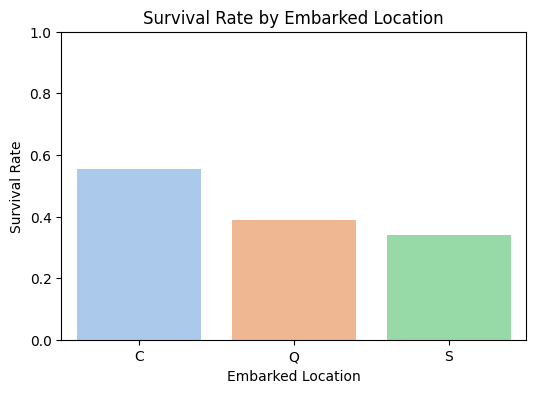

In [15]:
# Visualize survival rate of passangers from different embarked locations: Southampton, Cherbourg, and Queenstown
embarked_survival = {
    'C': titanic_df[titanic_df['Embarked_C']]['Survived'].mean(),
    'Q': titanic_df[titanic_df['Embarked_Q']]['Survived'].mean(),
    'S': titanic_df[titanic_df['Embarked_S']]['Survived'].mean()
}

embarked_df = pd.DataFrame(embarked_survival.items(), columns=['Embarked', 'Survival Rate'])
plt.figure(figsize=(6, 4))
sns.barplot(data=embarked_df, x='Embarked', y='Survival Rate', hue='Embarked', palette='pastel')
plt.title('Survival Rate by Embarked Location')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked Location')
plt.ylim(0, 1)
plt.show()

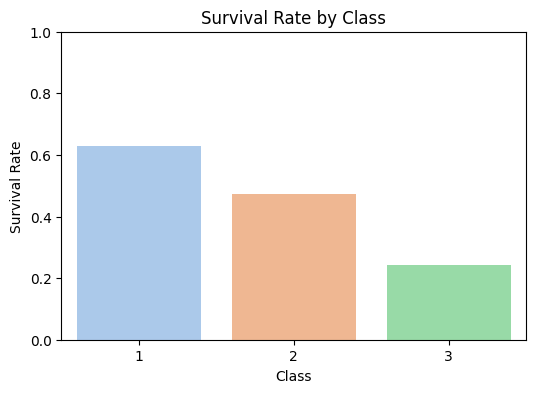

In [16]:
# Visualize survival rate of passangers from different classes
pclass_survival = {
    '1': titanic_df[titanic_df['Pclass_1'] == 1]['Survived'].mean(),
    '2': titanic_df[titanic_df['Pclass_2'] == 1]['Survived'].mean(),
    '3': titanic_df[titanic_df['Pclass_3'] == 1]['Survived'].mean()
}
pclass_df = pd.DataFrame(pclass_survival.items(), columns=['Pclass', 'Survival Rate'])
plt.figure(figsize=(6, 4))

sns.barplot(data=pclass_df, x='Pclass', y='Survival Rate', hue='Pclass', palette='pastel', errorbar=None)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class')
plt.ylim(0, 1)
plt.show()

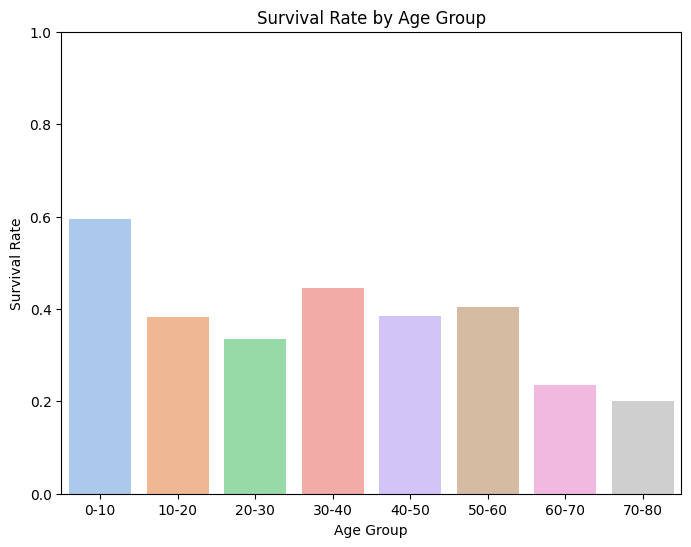

In [18]:
# Visualize survival rate of different age groups
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

plt.figure(figsize=(8, 6))
sns.barplot(data=titanic_df, x='AgeGroup', y='Survived', hue='AgeGroup', palette='pastel', errorbar=None)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


#### The graphs of the effect of the features, namely Sex, Embarked Location, Class, and Age Group allow us to visualize their effect on survival rate. Females had a higher survival rate than males, while passangers that embarked from Cherbourg had the highest survival rate. Passengers from 1st class had a higher survival rate than other classes and the age group that had the highest survival rate was 0-10 year-olds.

### Step 5: Perform a logistic regression analysis to predict survival

In [19]:
# Select features and target variable
features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'Fare', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = titanic_df[features]
y = titanic_df['Survived']

# Split data into training and test sets (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = LogisticRegression(solver='lbfgs', max_iter=300)
result = model.fit(X_train, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.2f}')


Logistic Regression Model Accuracy: 0.77


#### Adding a new passenger to predict their survival based on the Logistic Regression Model

In [20]:
import pandas as pd

# Example: A 2nd class, 30-year-old male who paid $7.25 and embarked from 'Q'
new_passenger = pd.DataFrame({
    'Pclass_1': [0],
    'Pclass_2': [1],
    'Pclass_3': [0],
    'Age': [30],
    'Fare': [7.25],
    'Sex_male': [1], 
    'Sex_female': [0],
    'Embarked_C': [0],
    'Embarked_Q': [1],
    'Embarked_S': [0]  
})

# Predict survival
prediction = model.predict(new_passenger)
probability = model.predict_proba(new_passenger) * 100

if prediction[0]==1:
    print("Predicted Survival: Survived")
else:
    print("Predicted Survival: Not Survived")


print(f"Survival Probability: {probability[0][1]:.2f}%")

Predicted Survival: Not Survived
Survival Probability: 30.64%


The new passenger (a 2nd class, 30-year-old male who paid $7.25 and embarked from 'Q'), was predicted to not survive. Based on his features, he had a 30.64% chance of survival.

In [22]:
# Extract the importance of features for survival based on their logistic regression coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False) # order from most to least important

# Display important features
print(coefficients)

            Coefficient
Sex_female     1.319501
Pclass_1       1.034139
Embarked_C     0.186986
Embarked_Q     0.178573
Pclass_2       0.036736
Fare          -0.001282
Age           -0.031914
Embarked_S    -0.370755
Pclass_3      -1.076072
Sex_male      -1.324697


### Step 6: Identify Important Features

The categories with positive logistic regression coefficients in the list above are indicators of survival, while those with negative coefficients are negative indicators of survival. Therefore, we can conclude that the characteristics that contributed most highly to survival were if passengers were female, in class 1, and/or in class two. The features that were linked to not surviving where being male, in class 3, and/or embarking from Southampton. 

These important features are crucial for further analysis because they enable us to ask other, more specific questions based on the findings to arrive at more accurate conclusions. For example, the feature that was the largest indicator for survival was being female. Why is this such a large indicator for survival? It is because women and children were prioritized and brought to the life boats first. 

### Step 7: Additional Analysis

#### 7.1 Relationship between Age and Survival Rate (Age Distribution)

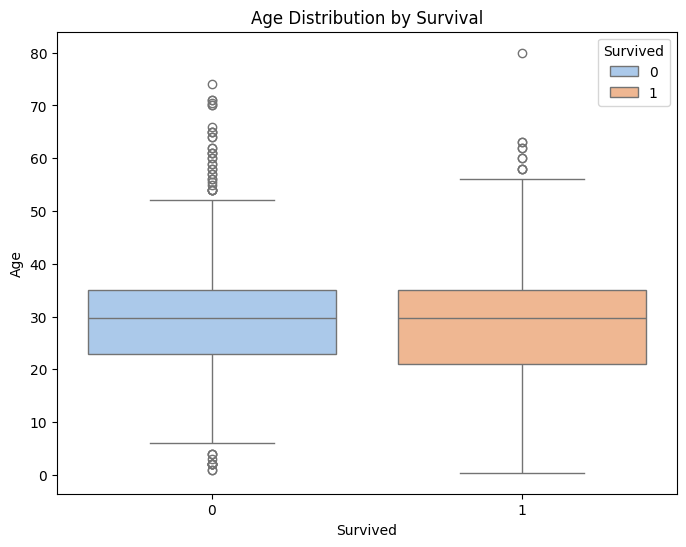

In [23]:
# Box plot displaying age distribution for those that survived and those that didn't
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic_df, x='Survived', y='Age', palette='pastel', hue="Survived")
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

##### 7.1 Conclusion

Based on the boxplot above and the bar graph earlier on (displaying the survival rate for different age groups), the age distribution for those that survived and didn't survive seems similar, with the range of those that survived being slighly wider. It is also important to note that the age range with the highest surivival rate was 0-10 years of age (displayed in the bar graph).

#### 7.2 Relationship between Fare and Survival Rate

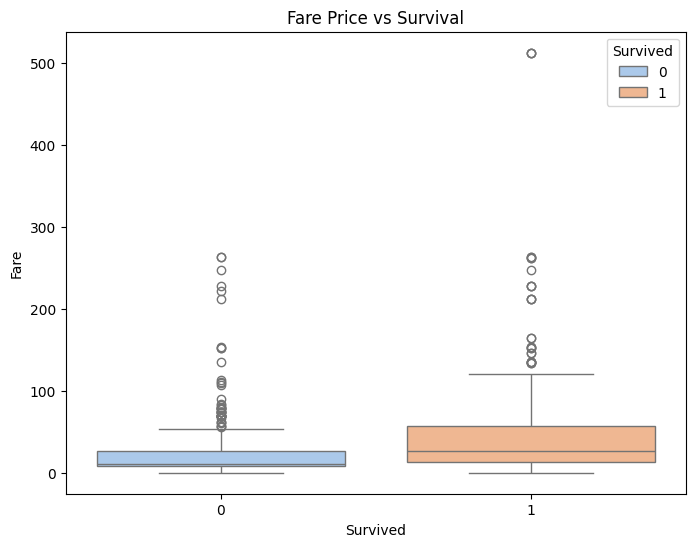

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic_df, x='Survived', y='Fare', palette='pastel', hue="Survived")
plt.title('Fare Price vs Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

##### 7.2 Conclusion

The Fare Price of those that survived is slightly higher than that of those that didn't, indicating that the higher the fare price, the higher the probability of a passenger's survival.